# Exploratory Analysis Step (Etapa de Análise Exploratória)

## Table of Contents
* [Packages](#1)
* [Exploratory Analysis](#2)
    * [Feature Engineering](#2.1)

<a name="1"></a>
## Packages (Pacotes)


In [5]:
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

import os
import sys
PROJECT_ROOT = os.path.abspath( # Getting Obtaining the absolute normalized version of the project root path (Obtendo a versão absoluta normalizada do path raíz do projeto)
    os.path.join( # Concatenating the paths (Concatenando os paths)
        os.getcwd(), # # Getting the path of the notebooks directory (Obtendo o path do diretório dos notebooks)
        os.pardir # Gettin the constant string used by the OS to refer to the parent directory (Obtendo a string constante usada pelo OS para fazer referência ao diretório pai)
    )
)
# Adding path to the list of strings that specify the search path for modules
# Adicionando o path à lista de strings que especifica o path de pesquisa para os módulos
sys.path.append(PROJECT_ROOT)
from src.eda import *

<a name="2"></a>
## Exploratory Analysis

In [7]:
COLORS = ['cornflowerblue', 'chocolate']

In [8]:
comics_data = pd.read_csv('../data/raw/comics_corpus.csv')
comics_data.head()

,id,title,description,y
0,94799,Demon Days: Mariko (2021) #1 (Variant),IN THE SHADOW OF KIRISAKI MOUNTAIN?A SECRET HI...,non-action
1,93339,The Mighty Valkyries (2021) #3,CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action
2,94884,The Mighty Valkyries (2021) #3 (Variant),CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action
3,93350,X-Corp (2021) #2,A SHARK IN THE WATER! After X-CORP’s shocking ...,non-action
4,94896,X-Corp (2021) #2 (Variant),A SHARK IN THE WATER! After X-CORP?s shocking ...,non-action


In [9]:
print(f'Comics data shape: {comics_data.shape}')

Comics data shape: (16927, 4)


In [10]:
print('Comics dataset:\n', comics_data.isnull().sum())

Comics dataset:
 id             0
title          0
description    0
y              0
dtype: int64


In [11]:
comics_data['y'].value_counts()

y
action        10582
non-action     6345
Name: count, dtype: int64

In [12]:
index = 0
label = 'action'

comic_text = comics_data[comics_data['y'] == label]['description'].tolist()[index]
print(f'Comic {index + 1} Label: {label}\n\nText {index + 1} example: {comic_text}')

Comic 1 Label: action

Text 1 example: CHILDREN OF THE AFTERLIFE! While Kraven the Hunter stalks Jane Foster on Midgard and the newest Valkyrie fights for her soul on Perdita, Karnilla, the queen of Hel, works a miracle in the land of the dead! But Karnilla isn’t Hel’s only ruler—and now she’s upset the cosmic balance. There will be a price to pay…and Karnilla intends to ensure the Valkyries pay it.


In [13]:
comics_data.iloc[:, 1:].describe().T

,count,unique,top,freq
title,16927,16855,100th Anniversary Special (2014) #1,5
description,16927,16927,CONCLUDING THIS CHILLING CHAPTER OF STEPHEN KI...,1
y,16927,2,action,10582


In [14]:
comics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16927 entries, 0 to 16926
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           16927 non-null  int64 
 1   title        16927 non-null  object
 2   description  16927 non-null  object
 3   y            16927 non-null  object
dtypes: int64(1), object(3)
memory usage: 529.1+ KB


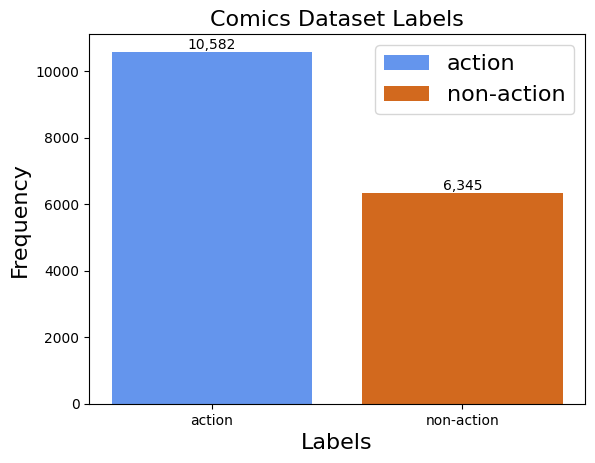

In [15]:
plot_bar(comics_data, colors=COLORS, name='comics_labels')

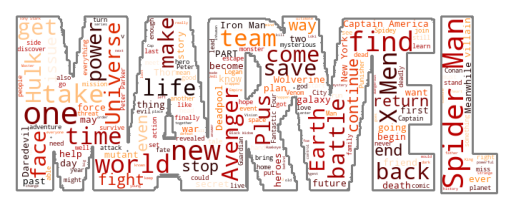

In [24]:
plot_wordcloud(comics_data, name='marvel_wordcloud')

<a name="2.1"></a>
## Feature Engineering

In [17]:
comics_data['sentence_size'] = comics_data['description'].map(lambda x: len(x))
comics_data['word_count'] = comics_data['description'].map(lambda x: len(x.split()))
comics_data['capslock_word_count'] = comics_data['description'].map(lambda x: len(re.findall(r'\b[A-Z]+\b', x)))
comics_data.head()

,id,title,description,y,sentence_size,word_count,capslock_word_count
0,94799,Demon Days: Mariko (2021) #1 (Variant),IN THE SHADOW OF KIRISAKI MOUNTAIN?A SECRET HI...,non-action,572,95,21
1,93339,The Mighty Valkyries (2021) #3,CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action,363,64,4
2,94884,The Mighty Valkyries (2021) #3 (Variant),CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action,363,64,4
3,93350,X-Corp (2021) #2,A SHARK IN THE WATER! After X-CORP’s shocking ...,non-action,298,52,9
4,94896,X-Corp (2021) #2 (Variant),A SHARK IN THE WATER! After X-CORP?s shocking ...,non-action,298,52,9


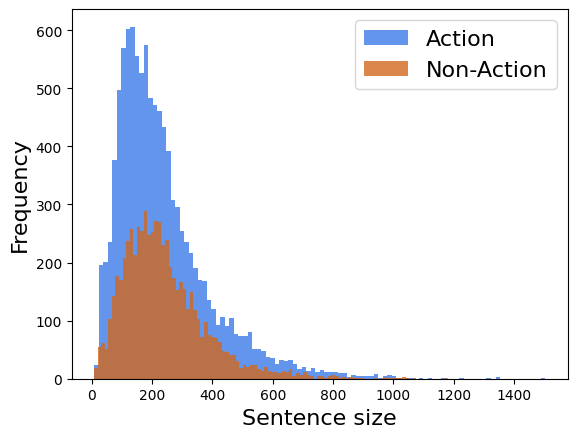

In [18]:
plot_hist_vs(
    comics_data, 
    'sentence_size', 
    xlabel='Sentence size',
    bins=100, 
    colors=COLORS,
    name='sentence_size'
)

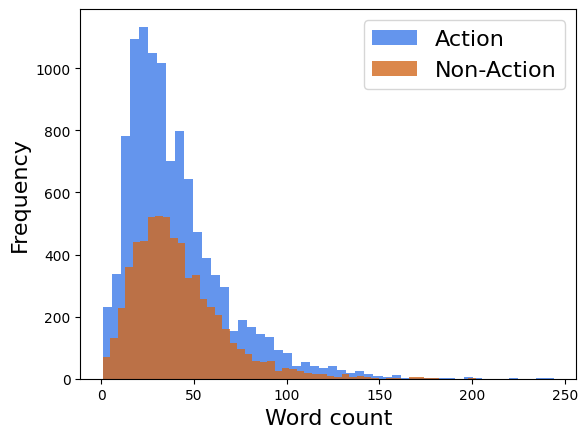

In [19]:
plot_hist_vs(
    comics_data,
    'word_count',
    xlabel='Word count',
    bins=50,
    colors=COLORS,
    name='word_count'
)

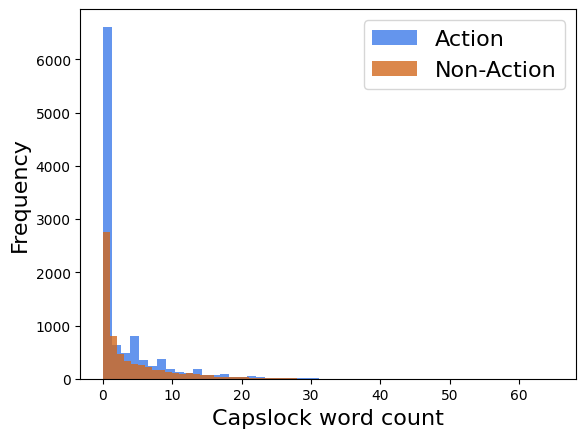

In [20]:
plot_hist_vs(
    comics_data, 
    'capslock_word_count', 
    xlabel='Capslock word count',
    bins=50,
    colors=COLORS,
    name='capslock_word_count'
)